<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Elevation  602 non-null    float64
 1   Distance   0 non-null      float64
dtypes: float64(2)
memory usage: 9.5 KB
   Elevation  Distance
0    1447.71         1
1    1447.73         2
2    1447.73         3
3    1447.75         4
4    1447.76         5


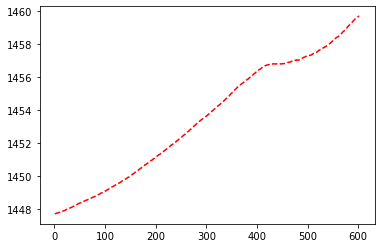

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline

#read *.txt file
data = pd.read_csv("elevation1.txt", sep = "\t", names=['Elevation', 'Distance'],engine='python', encoding = "cp949")
data.info()

#distance
dis = 99.155894
#distance_interval
d_dis = dis/len(data)

#insert distance data 
data['Distance']=range(1,len(data)+1)
#data.head()

#data["Distance"] = data["Distance"] * d_dis
#data.head()

print(data.head())
x = np.c_[data['Distance']] #np.c_ slice a maatrix to use values
y = np.c_[data['Elevation']]
plt.plot(x,y,'r--')

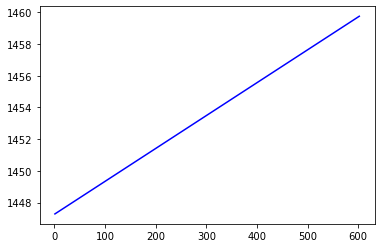

In [143]:
#linear model test
#model = linear_model.LinearRegression()
#model.fit(x,y)
#t0, t1 = model.intercept_[0], model.coef_[0][0]
#t0, t1
#plt.plot(x,t0 +t1*x, "b")

class:  ndarray
shape:  (1003, 2)
strides:  (16, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x55c891b49e30
byteorder:  little
byteswap:  False
type: float64

class:  ndarray
shape:  (602, 2)
strides:  (16, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x55c891b4dcf0
byteorder:  little
byteswap:  False
type: float64


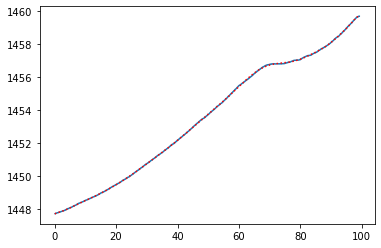

In [198]:
poly = preprocessing.PolynomialFeatures(degree=20, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly',poly), ('scal',scaler),('lin', lin_reg2)])
pipeline_reg.fit(x,y)

GPR_x = range(1,1004,1)
GPR_x2 = np.array(GPR_x)
GPR_x3=GPR_x2 * 602.0/1003.0
GPR_x4=np.c_[GPR_x3]

curve = pipeline_reg.predict(GPR_x4)
curve2 = np.c_[curve]

#np.info(curve2)
#print("")
#np.info(GPR_x4)
#plt.plot(GPR_x4,curve2, 'r--')

GPR_elev = np.concatenate((GPR_x4*d_dis,curve2), axis=1)

dis2 = data["Distance"] * d_dis
dis3 = np.c_[dis2]
elev = np.concatenate((dis3,y), axis=1)


plt.plot(dis3,y)
plt.plot(GPR_x4*d_dis,curve2,'r:')

#regressioned elevation data
np.info(GPR_elev)
print("")
#original elevation data
np.info(elev)

np.savetxt("reg_elevation1.txt",GPR_elev)
np.savetxt("elevation1_with_dis.txt,",elev)
